<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [1]:
import numpy as np
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [2]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

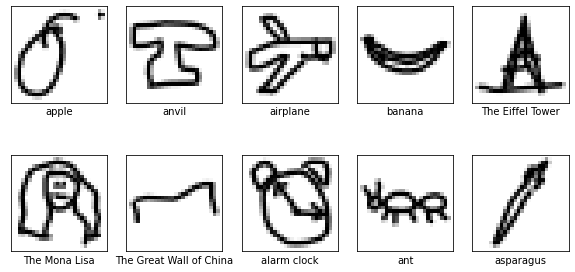

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [4]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

In [59]:
model.add(
    # Hidden Layer
    Dense(32, activation="relu", input_dim=784)
)
model.add(
    # Hidden Layer
    Dense(32, activation="relu", input_dim=784)
)
model.add(
    Dense(10, activation='softmax')
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
baseline = model.fit(X, y, epochs=30, validation_split=0.2)

Train on 80000 samples, validate on 20000 samples
Epoch 1/30
80000/80000 [==============================] - 5s 67us/sample - loss: 2.0429 - accuracy: 0.4205 - val_loss: 1.2931 - val_accuracy: 0.5627
Epoch 2/30
80000/80000 [==============================] - 6s 70us/sample - loss: 1.2422 - accuracy: 0.5809 - val_loss: 1.2106 - val_accuracy: 0.6179
Epoch 3/30
80000/80000 [==============================] - 6s 70us/sample - loss: 1.1404 - accuracy: 0.6225 - val_loss: 1.1804 - val_accuracy: 0.6120
Epoch 4/30
80000/80000 [==============================] - 5s 62us/sample - loss: 1.0947 - accuracy: 0.6382 - val_loss: 1.1230 - val_accuracy: 0.6461
Epoch 5/30
80000/80000 [==============================] - 5s 65us/sample - loss: 1.0608 - accuracy: 0.6525 - val_loss: 1.0711 - val_accuracy: 0.6520
Epoch 6/30
80000/80000 [==============================] - 5s 61us/sample - loss: 1.0188 - accuracy: 0.6663 - val_loss: 0.9962 - val_accuracy: 0.6780
Epoch 7/30
80000/80000 [==============================] 

KeyboardInterrupt: 

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [20]:
baseline.history

{'loss': [2.3600101893901826,
  1.3503579911470414,
  1.2290141667604446,
  1.168827735888958,
  1.139219022345543,
  1.1232218045711517,
  1.1003092819690705,
  1.0867523029208184,
  1.0569932997345923,
  1.0393046409249305,
  0.9968511476516724,
  0.9392361876368522,
  0.8922197646856308,
  0.8730834433794021,
  0.8629098552107811,
  0.8462776945888996,
  0.8331006248354912,
  0.8277464523553848,
  0.8296234817862511,
  0.8214726330876351,
  0.8192781419038773,
  0.8103713450729847,
  0.7991305058836937,
  0.7952310794591904,
  0.7912017774283886,
  0.7868766717791558,
  0.787604023039341,
  0.7793512289106845,
  0.7817151074171066,
  0.7813424808561802],
 'accuracy': [0.388675,
  0.5223375,
  0.578525,
  0.6072125,
  0.6162875,
  0.62175,
  0.624725,
  0.6297,
  0.6420625,
  0.6490875,
  0.67735,
  0.7108375,
  0.7305125,
  0.733375,
  0.7384,
  0.7416,
  0.74715,
  0.7497625,
  0.7458875,
  0.7523125,
  0.7540375,
  0.7561875,
  0.758925,
  0.7620375,
  0.762425,
  0.7622625,
  0.7

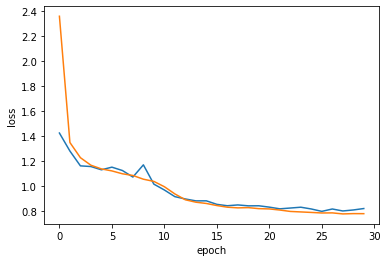

In [21]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(baseline.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [27]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
adam = model.fit(X, y, epochs=30, validation_split=0.2)

Train on 80000 samples, validate on 20000 samples
Epoch 1/30
80000/80000 [==============================] - 5s 57us/sample - loss: 1.4785 - accuracy: 0.4251 - val_loss: 1.4812 - val_accuracy: 0.4281
Epoch 2/30
80000/80000 [==============================] - 4s 54us/sample - loss: 1.4737 - accuracy: 0.4264 - val_loss: 1.4547 - val_accuracy: 0.4489
Epoch 3/30
80000/80000 [==============================] - 4s 54us/sample - loss: 1.4803 - accuracy: 0.4267 - val_loss: 1.5303 - val_accuracy: 0.4266
Epoch 4/30
80000/80000 [==============================] - 4s 54us/sample - loss: 1.4789 - accuracy: 0.4234 - val_loss: 1.4871 - val_accuracy: 0.4244
Epoch 5/30
80000/80000 [==============================] - 4s 55us/sample - loss: 1.4903 - accuracy: 0.4116 - val_loss: 1.4733 - val_accuracy: 0.4209
Epoch 6/30
80000/80000 [==============================] - 4s 53us/sample - loss: 1.4525 - accuracy: 0.4238 - val_loss: 1.4641 - val_accuracy: 0.4211
Epoch 7/30
80000/80000 [==============================] 

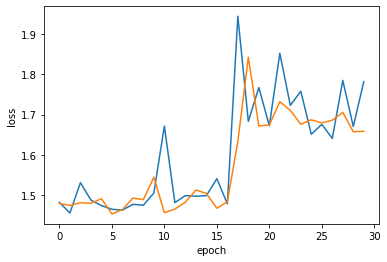

In [28]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(adam.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

>1. There are thre main types of of Loss functions. The three types are Regressions, Binary Classification and Multi-class Classifications.Each of these main classes is seprate in to 
various sub classes. However for the sake of answering the question Binary Classification (cross-entrophy) is best suited for predicting 1/0 however for Binary Classification there 
are others alternatives such as Hinged Loss model that is based on SVM. In case where Hinged Loss model perform better than Cross-entrophy is might be worth it to try Squared Hinged Loss model.

>2. You can simply use a loss function to optimize your model. An optimizer is used to minimize the loss function. An accuracy metric is used to calculate the performance of your model, for example, Confusion matrix, etc.

>3. Optimizer find teh value of the prameter when the loss function is the lowest. Stohastic will make update to the weight after every datapoint but sometime with larger dataset 
and take noisy jumps that go toward the opposite direction. Then come batch SGD where instead of updateing after every data point it make a update after n interations. After this we add the concepts of momentum where it change teh weight as the loss decrease Rate of change increase. Then we introducate the concepts of accelleration a value that affect the value of the momentum. ADAGRAD introduce the adaptive movement of learning raate and allows it to trverse in extar dimension toward prediction model. Newers Optimizers such as Adam is momentum for adaptive learning rate. Nadam is accerations for adams.



## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


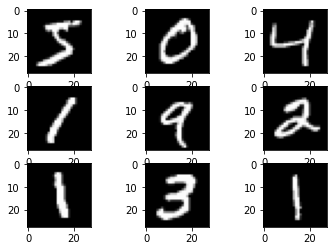

In [32]:

# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
# plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [38]:
trainX.shape, trainy.shape, testX.shape, testy.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [39]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [43]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [44]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [45]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [46]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

> 98.542
> 98.650
> 98.642
> 98.808
> 98.767


C:\Users\Sasana Kongjareon\.conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Sasana Kongjareon\.conda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


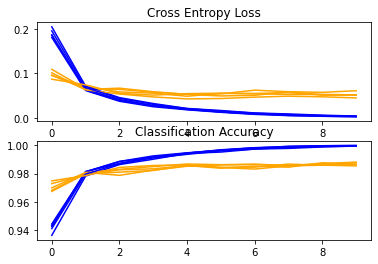

Accuracy: mean=98.682 std=0.095, n=5


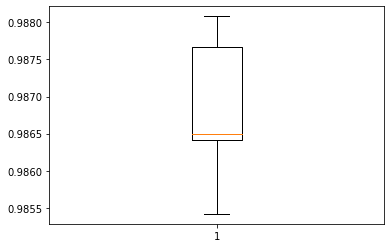

In [49]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

In [70]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
  import time
  run_id= time.strftime("run_%Y_%m_d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X,y, 
                    epochs=10,
                    validation_split=0.3, 
                    callbacks=[tensorboard_cb]
                    )

Train on 70000 samples, validate on 30000 samples
Epoch 1/10
70000/70000 [==============================] - 6s 92us/sample - loss: 0.7068 - accuracy: 0.7903 - val_loss: 0.8103 - val_accuracy: 0.7714
Epoch 2/10
70000/70000 [==============================] - 6s 92us/sample - loss: 0.7116 - accuracy: 0.7887 - val_loss: 0.7878 - val_accuracy: 0.7737
Epoch 3/10
70000/70000 [==============================] - 6s 91us/sample - loss: 0.7059 - accuracy: 0.7903 - val_loss: 0.8086 - val_accuracy: 0.7736
Epoch 4/10
70000/70000 [==============================] - 7s 94us/sample - loss: 0.7128 - accuracy: 0.7895 - val_loss: 0.8203 - val_accuracy: 0.7715
Epoch 5/10
70000/70000 [==============================] - 6s 93us/sample - loss: 0.7070 - accuracy: 0.7901 - val_loss: 0.7960 - val_accuracy: 0.7746
Epoch 6/10
70000/70000 [==============================] - 6s 92us/sample - loss: 0.7044 - accuracy: 0.7898 - val_loss: 0.7906 - val_accuracy: 0.7770
Epoch 7/10
70000/70000 [==============================] 

In [71]:

%reload_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006


Reusing TensorBoard on port 6006 (pid 32404), started 0:04:32 ago. (Use '!kill 32404' to kill it.)